### 1. LOADING FILES

In [1]:
import pickle 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import datetime

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,f1_score,confusion_matrix

In [3]:
def save_files(model):
    '''
    Grabar modelos con formato binario en una carpeta
    '''
    os.chdir('E:/Bootcamp_22/Javier/Repositorios/Machine_Learning/model')
    date=str(datetime.today().strftime('%y%m%d%H%M%S'))
    name=input("Introduce el nombre del modelo a grabar (iniciales): ")
    file=name+date+'.pickle'
    pickle.dump(model,open(file,'wb'))

In [4]:
def load_files(file):
    '''
    Cargar modelos con formato binario en un notebook o fichero python
    '''
    os.chdir('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\model')
    model = pickle.load( open( file, "rb" ) )
    return model

In [5]:
train=pd.read_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_train.csv',sep=',')
test=pd.read_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_test.csv',sep=',')
X_test=test[['Código Distrito Centro','Age_range_code','Nationality_code','Sexo_code']]
X_train=train[['Código Distrito Centro','Age_range_code','Nationality_code','Sexo_code']]
y_test=test['Código Tipo Supuesto Urgente']
y_train=train['Código Tipo Supuesto Urgente']

In [28]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(8820, 4)
(26460, 4)
(8820,)
(26460,)


Aqui vamos a cargar los modelos para pasar los test

In [6]:
#ADA = load_files('ADA220909190844.pickle')
BAG = load_files('BAG220909190839.pickle')
#DTC = load_files('DTC220909190809.pickle')
#GBCT=load_files('GBCT220909190855.pickle')
#RND=load_files('RND220909190829.pickle')


### 2. CALCULATING ERROR IN EACH MODEL

In [7]:
def error_modelo(model, x_test, Y_test):
    '''
    Dejamos grabada cada uno de los parámetros de cada modelo y hacemos su representación
    '''
    y_pred = model.predict(X_test)
    f1_model=f1_score(y_test, y_pred,average='macro')
    acc_model=accuracy_score(y_test, y_pred)
    precision_model=precision_score(y_test, y_pred,average='macro')
    recall_model=recall_score(y_test, y_pred,average='macro')
    roc_auc_model=roc_auc_score(y_test, model.predict_proba(X_test),multi_class='ovr')
    conf_model=confusion_matrix(y_test, y_pred, normalize='true')
    model_error = {'accuracy': acc_model, 'f-1': f1_model, 'recall': recall_model , 'precision': precision_model}
    df=pd.DataFrame.from_dict(model_error,orient='index')
    print('Accuracy', acc_model)
    print('F1', f1_model)
    print('Precision', precision_model)
    print('Recall', recall_model)
    print('-'*30)
    print('ROC', roc_auc_model)

    plt.figure(figsize=(10,10))
    sns.heatmap(conf_model,xticklabels=[10,20,30,40,50],yticklabels=[10,20,30,40,50], annot=True)
    return df




**ADA BOOST**

In [8]:
seed= 20
estimator = DecisionTreeClassifier(max_depth=7,random_state=seed)
ADA_m=AdaBoostClassifier(base_estimator = estimator,n_estimators=100,
                             random_state=seed,learning_rate=0.02)
ADA_m.fit(X_train, y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=7,
                                                         random_state=20),
                   learning_rate=0.02, n_estimators=100, random_state=20)

c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy 0.765079365079365
F1 0.44760165568416677
Precision 0.4388930100424998
Recall 0.4571825260813743
------------------------------
ROC 0.7990191889447507


,HD_ADA
accuracy,0.765079
f-1,0.447602
recall,0.457183
precision,0.438893


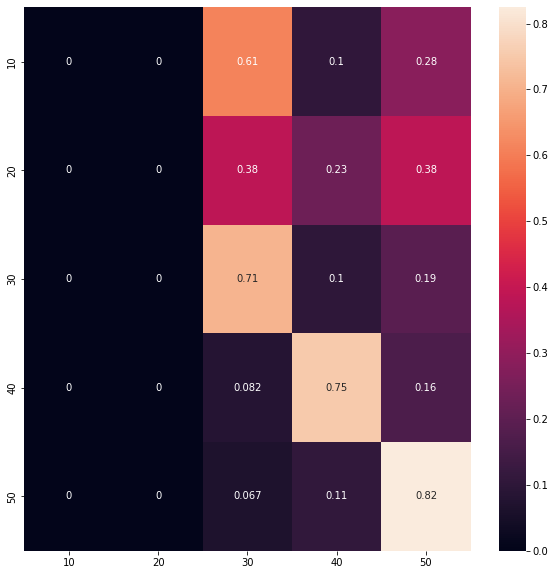

In [9]:
df_HD_ADA= error_modelo(ADA_m, X_test, y_test)
df_HD_ADA.columns=['HD_ADA']
df_HD_ADA

Se observa  que se consigue que el f1-score ascienda *0.005 puntos* manipulando manualmente los hiperparámetros del módelo.

**BAG**

In [8]:
seed= 20
estimator = DecisionTreeClassifier(max_depth=9,random_state=seed)
BAG_m=BaggingClassifier(base_estimator = estimator,random_state=seed,max_features=4,n_estimators=250,max_samples=500)
#        AdaBoostClassifier(base_estimator = estimator,n_estimators=100,
#                             random_state=seed,learning_rate=0.01)
BAG_m.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=9,
                                                        random_state=20),
                  max_features=4, max_samples=500, n_estimators=250,
                  random_state=20)

c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy 0.7562519784742007
F1 0.44564710547786
Precision 0.4360257605672741
Recall 0.4569071067115821
------------------------------
ROC 0.8092189557225791


,HD_BAG
accuracy,0.756252
f-1,0.445647
recall,0.456907
precision,0.436026


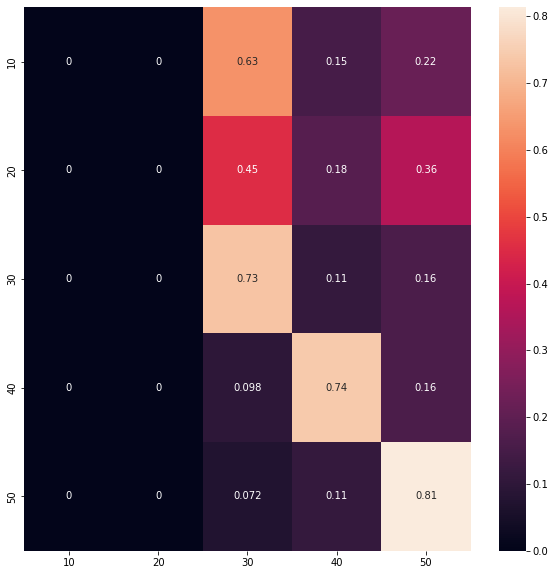

In [9]:
df_HD_BAG= error_modelo(BAG_m, X_test, y_test)
df_HD_BAG.columns=['HD_BAG']
df_HD_BAG

Se observa  que se consigue que el f1-score ascienda *0.004 puntos* manipulando manualmente los hiperparámetros del módelo.

**DTC**

In [16]:
seed= 20
DTC_m=DecisionTreeClassifier(random_state=seed,max_depth=8,min_samples_leaf =50)
DTC_m.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=8, min_samples_leaf=50, random_state=20)

Accuracy 0.7623582766439909
F1 0.4464973635230075
Precision 0.4372344524933549
Recall 0.45691278365156973
------------------------------
ROC 0.801394056408624


c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,HD_DTC
accuracy,0.762358
f-1,0.446497
recall,0.456913
precision,0.437234


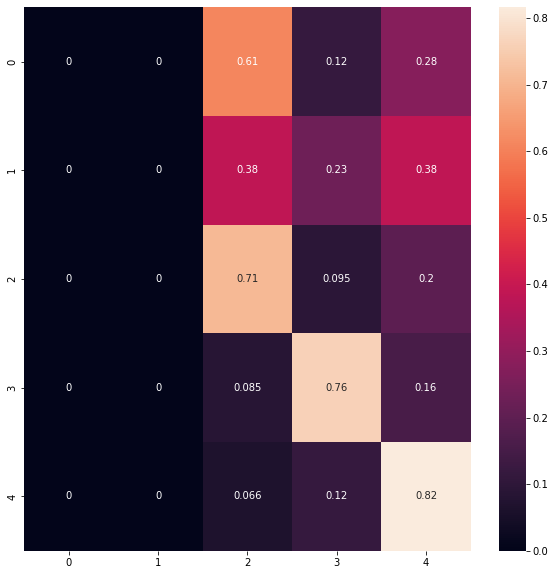

In [17]:
df_HD_DTC= error_modelo(DTC_m, X_test, y_test)
df_HD_DTC.columns=['HD_DTC']
df_HD_DTC

Se observa  que se consigue que el f1-score ascienda *0.002 puntos* manipulando manualmente los hiperparámetros del módelo.

**RND**

In [18]:
seed= 20

RND_m=RandomForestClassifier(random_state=seed,n_estimators=400,criterion='gini',max_samples=500,max_depth =15)
RND_m.fit(X_train, y_train)


RandomForestClassifier(max_depth=15, max_samples=500, n_estimators=400,
                       random_state=20)

c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy 0.7631519274376417
F1 0.44618898583191385
Precision 0.4376402828192921
Recall 0.4555855204669014
------------------------------
ROC 0.8291830970108798


,HD_RND
accuracy,0.763152
f-1,0.446189
recall,0.455586
precision,0.437640


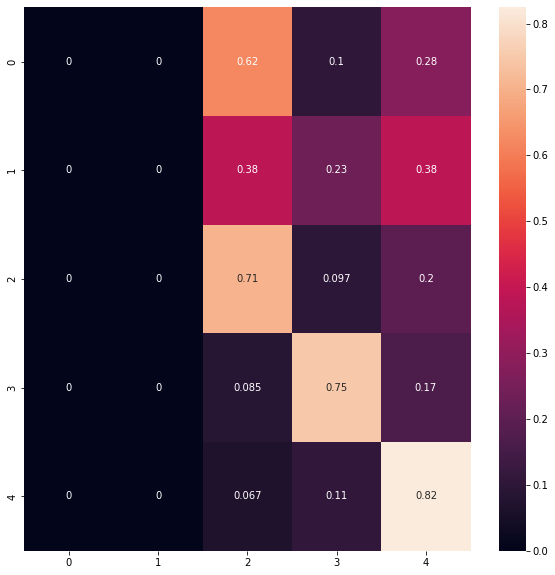

In [19]:
df_HD_RND= error_modelo(RND_m, X_test, y_test)
df_HD_RND.columns=['HD_RND']
df_HD_RND

Se observa  que se consigue que el f1-score ascienda *0.003 puntos* manipulando manualmente los hiperparámetros del módelo.

**GBCT**

In [20]:
seed= 20

GBCT_m=GradientBoostingClassifier(n_estimators=150,random_state=seed,subsample =0.65,min_samples_leaf =80)
GBCT_m.fit(X_train, y_train)


GradientBoostingClassifier(min_samples_leaf=80, n_estimators=150,
                           random_state=20, subsample=0.65)

c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy 0.764172335600907
F1 0.4470915082647977
Precision 0.4382297694726133
Recall 0.4569329304329943
------------------------------
ROC 0.8469558424083843


,HD_GBCT
accuracy,0.764172
f-1,0.447092
recall,0.456933
precision,0.438230


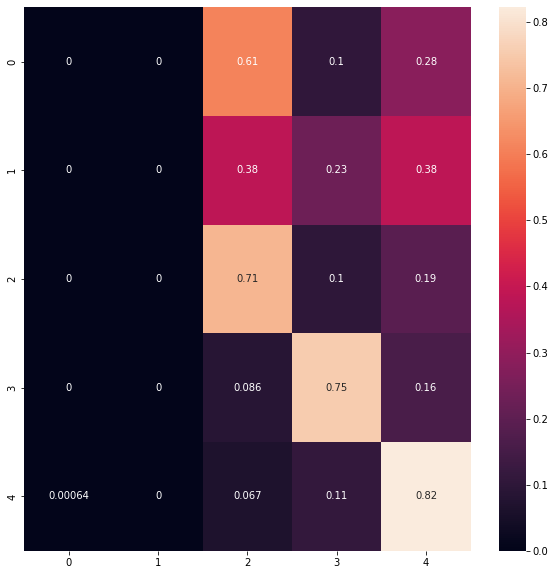

In [21]:
df_HD_GBCT= error_modelo(GBCT_m, X_test, y_test)
df_HD_GBCT.columns=['HD_GBCT']
df_HD_GBCT

Se observa  que se consigue que el f1-score ascienda *0.001 puntos* manipulando manualmente los hiperparámetros del módelo.

In [22]:
df_errores=pd.concat([df_HD_ADA,df_HD_BAG,df_HD_DTC,df_HD_RND,df_HD_GBCT],axis=1)
df_errores

,HD_ADA,HD_BAG,HD_DTC,HD_RND,HD_GBCT
accuracy,0.765079,0.766213,0.762358,0.763152,0.764172
f-1,0.447602,0.448690,0.446497,0.446189,0.447092
recall,0.457183,0.458857,0.456913,0.455586,0.456933
precision,0.438893,0.439595,0.437234,0.437640,0.438230


In [10]:
save_files(BAG_m)